# PRÁCTICA DE MACHINE LEARNING
## Maite Alonso Parra

Carga de librerías necesarias.

In [4]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import sklearn

Carga del dataset en un DataFrame de pandas.

In [5]:
airbnb_data = pd.read_csv(
    "airbnb-listings-extract.csv",
    sep=None, engine="python"   # permite detectar automaticamente el separador
)

Muestra los nombres de todas las variables del dataset.

In [6]:
for col in airbnb_data.columns:
    print(col)


ID
Listing Url
Scrape ID
Last Scraped
Name
Summary
Space
Description
Experiences Offered
Neighborhood Overview
Notes
Transit
Access
Interaction
House Rules
Thumbnail Url
Medium Url
Picture Url
XL Picture Url
Host ID
Host URL
Host Name
Host Since
Host Location
Host About
Host Response Time
Host Response Rate
Host Acceptance Rate
Host Thumbnail Url
Host Picture Url
Host Neighbourhood
Host Listings Count
Host Total Listings Count
Host Verifications
Street
Neighbourhood
Neighbourhood Cleansed
Neighbourhood Group Cleansed
City
State
Zipcode
Market
Smart Location
Country Code
Country
Latitude
Longitude
Property Type
Room Type
Accommodates
Bathrooms
Bedrooms
Beds
Bed Type
Amenities
Square Feet
Price
Weekly Price
Monthly Price
Security Deposit
Cleaning Fee
Guests Included
Extra People
Minimum Nights
Maximum Nights
Calendar Updated
Has Availability
Availability 30
Availability 60
Availability 90
Availability 365
Calendar last Scraped
Number of Reviews
First Review
Last Review
Review Scores Rati

Lista todas las categorias únicas dentro de la variable "City", junto con su frecuencia de aparicion.

In [7]:
airbnb_data["City"].str.strip().str.lower().value_counts()


madrid             13217
barcelona            292
london               132
paris                108
马德里                   52
                   ...  
kimmage                1
port d'andratx         1
forest                 1
peguera, calvià        1
son vida               1
Name: City, Length: 244, dtype: int64

Filtra los registros de Madrid, evitando problemas de mayúsculas, espacios, o valores nulos.

In [8]:
# Limpieza y filtro de la variable City

# Normalizar: eliminar espacios y pasar a minúsculas
airbnb_data["City_clean"] = airbnb_data["City"].astype(str).str.strip().str.lower()

# Mostrar valores únicos normalizados (por control)
print("Ciudades detectadas (normalizadas):")
print(airbnb_data["City_clean"].value_counts())

# Filtrar solo Madrid
df_madrid = airbnb_data[airbnb_data["City_clean"] == "madrid"].copy()

print(f"\nFilas totales: {len(airbnb_data)}, Filas en Madrid: {len(df_madrid)}")


Ciudades detectadas (normalizadas):
madrid           13217
barcelona          292
london             132
paris              108
马德里                 52
                 ...  
san lázaro           1
madid                1
tsim sha tsui        1
st peters            1
son vida             1
Name: City_clean, Length: 245, dtype: int64

Filas totales: 14780, Filas en Madrid: 13217


## 1. Preparación de datos: Division train/test.

In [9]:
# División Train/Test

from sklearn.model_selection import train_test_split

# Definir variable objetivo y variables predictoras
X = df_madrid.drop(columns=["Price"])
y = df_madrid["Price"]

# División 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Comprobación de tamaños
print(f"Tamaño Train: {X_train.shape}")
print(f"Tamaño Test: {X_test.shape}")


Tamaño Train: (10573, 89)
Tamaño Test: (2644, 89)


## 2. Análisis exploratorio de datos sobre el train set.

### Conocer la estructura de los datos.

In [10]:
print("Shapes -> X_train:", X_train.shape, " | y_train:", y_train.shape)
print("\nTipos de datos (X_train):")
print(X_train.dtypes.value_counts())
print("\nPrimeras 5 columnas y sus tipos:")
print(X_train.dtypes.head())

print("\nMuestra de X_train:")
display(X_train.head())

print("\nMuestra de y_train (Price):")
display(y_train.head())

print("\nInfo resumida de X_train:")
X_train.info(memory_usage='deep')


Shapes -> X_train: (10573, 89)  | y_train: (10573,)

Tipos de datos (X_train):
object     54
float64    22
int64      13
dtype: int64

Primeras 5 columnas y sus tipos:
ID               int64
Listing Url     object
Scrape ID        int64
Last Scraped    object
Name            object
dtype: object

Muestra de X_train:


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features,City_clean
2984,9460773,https://www.airbnb.com/rooms/9460773,20170407214119,2017-04-08,"MIGUEL SERVET, ATOCHA, REINA SOFIA",The apartment is very well comunicated. The me...,"El apartamento es un lugar muy tranquilo, equi...",The apartment is very well comunicated. The me...,none,El barrio de Lavapies es probablemente,...,10.0,9.0,NaN,NaN,strict,7.0,4.07,"40.4055295439,-3.70237778247","Host Has Profile Pic,Host Identity Verified,Re...",madrid
3034,12891724,https://www.airbnb.com/rooms/12891724,20170407214119,2017-04-08,City Center!-Huertas-Prado-Retiro.,Bonito apartamento entero con capacidad para c...,NaN,Bonito apartamento entero con capacidad para c...,none,NaN,...,10.0,10.0,NaN,NaN,moderate,1.0,1.23,"40.4167559349,-3.70019630158","Host Has Profile Pic,Host Identity Verified,Is...",madrid
8058,17208290,https://www.airbnb.com/rooms/17208290,20170407214119,2017-04-08,Huertas City Center,Unique apartment located in Huertas neighborho...,We kindly invite you to enjoy this apartment i...,Unique apartment located in Huertas neighborho...,none,Se encuentra situada en el corazón de Madrid a...,...,10.0,9.0,NaN,NaN,strict,67.0,3.13,"40.4145494379,-3.6988236258","Host Has Profile Pic,Host Identity Verified,Is...",madrid
4628,11916077,https://www.airbnb.com/rooms/11916077,20170407214119,2017-04-08,Habitacion luminosa cerca de atocha,"Es un piso luminoso, con decoración moderna, e...",NaN,"Es un piso luminoso, con decoración moderna, e...",none,NaN,...,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.3972266024,-3.69508027554","Host Has Profile Pic,Requires License",madrid
2687,9600621,https://www.airbnb.com/rooms/9600621,20170407214119,2017-04-08,Near airport-Small 6m2 Bed room with full(double),"The bedroom have 6m2,located in last floor of ...",The bedroom have 6 squared meters and is very ...,"The bedroom have 6m2,located in last floor of ...",none,The apartment is located in a very quite place...,...,9.0,9.0,NaN,NaN,moderate,1.0,3.71,"40.4314861379,-3.61739682264","Host Has Profile Pic,Requires License",madrid



Muestra de y_train (Price):


2984     45.0
3034     60.0
8058    179.0
4628     60.0
2687     20.0
Name: Price, dtype: float64


Info resumida de X_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10573 entries, 2984 to 8254
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10573 non-null  int64  
 1   Listing Url                     10573 non-null  object 
 2   Scrape ID                       10573 non-null  int64  
 3   Last Scraped                    10573 non-null  object 
 4   Name                            10573 non-null  object 
 5   Summary                         10178 non-null  object 
 6   Space                           7738 non-null   object 
 7   Description                     10567 non-null  object 
 8   Experiences Offered             10573 non-null  object 
 9   Neighborhood Overview           6622 non-null   object 
 10  Notes                           4036 non-null   object 
 11  Transit                         6573 non-null   object 
 12  Acc

### Detectar valores nulos o inconsistentes.

,na_count,na_pct
Has Availability,10573,100.000000
Jurisdiction Names,10573,100.000000
Host Acceptance Rate,10573,100.000000
License,10379,98.165138
Square Feet,10153,96.027618
Monthly Price,7911,74.822661
Weekly Price,7895,74.671333
Notes,6537,61.827296
Security Deposit,6051,57.230682
Interaction,4564,43.166556


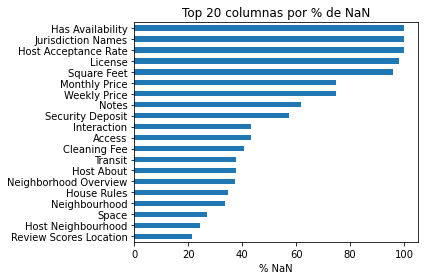

In [11]:
na_cnt = X_train.isna().sum()
na_pct = 100 * na_cnt / len(X_train)
na_table = (
    pd.DataFrame({"na_count": na_cnt, "na_pct": na_pct})
    .sort_values("na_pct", ascending=False)
)
display(na_table.head(25))

# Gráfico: top-20 columnas con más NaN (una figura)
import matplotlib.pyplot as plt

topN = 20
plt.figure()
na_table.head(topN)["na_pct"].iloc[::-1].plot(kind="barh")
plt.title(f"Top {topN} columnas por % de NaN")
plt.xlabel("% NaN")
plt.tight_layout()
plt.show()


### Analizar la distribución de variables.

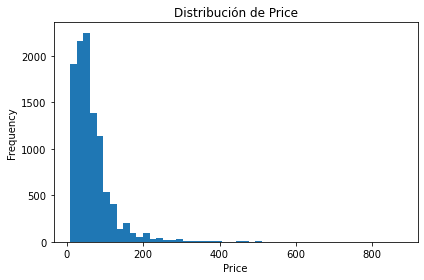

Numéricas detectadas: 35


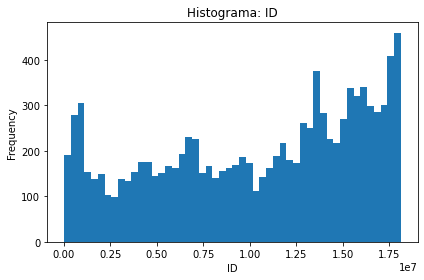

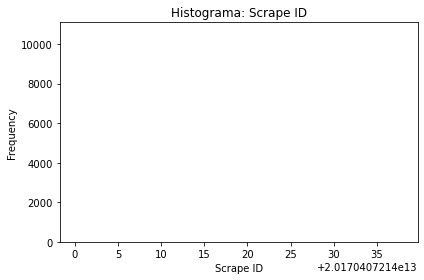

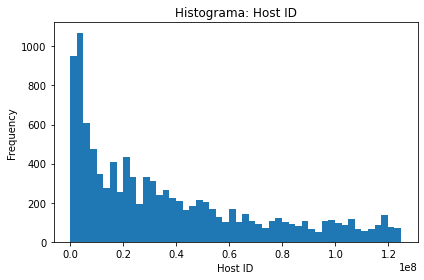

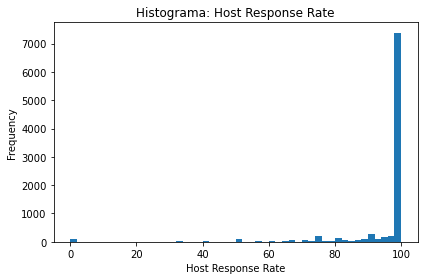

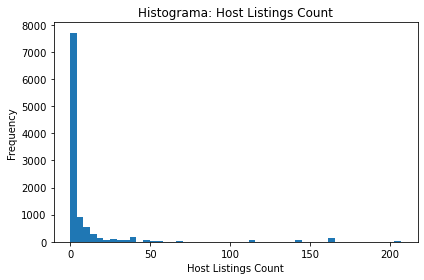

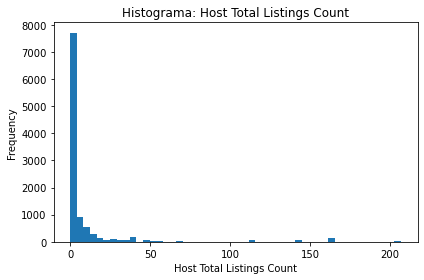

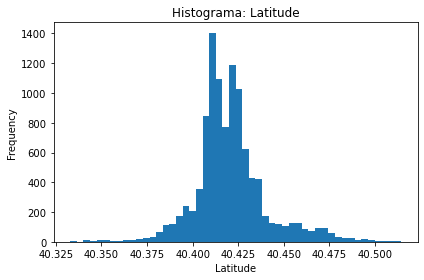

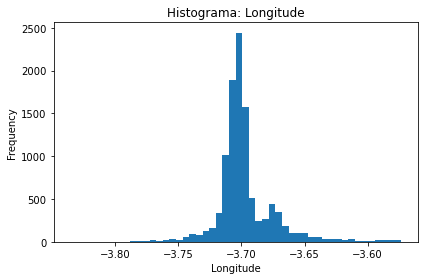

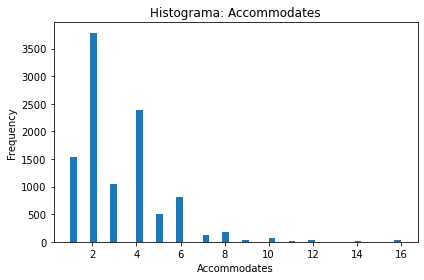

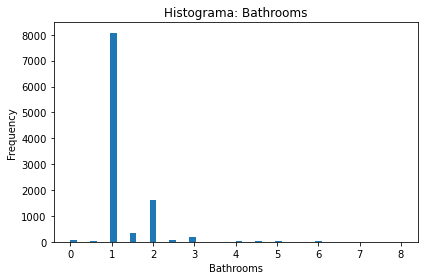

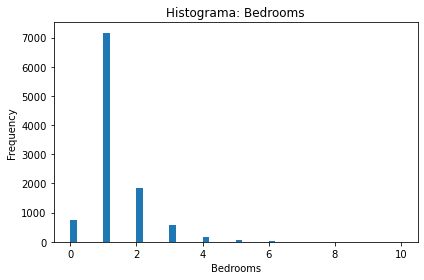

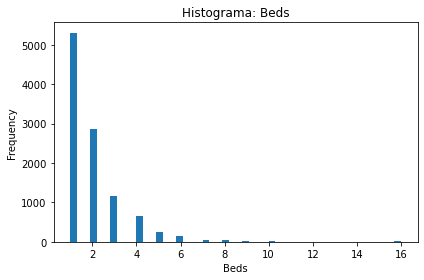

In [12]:
# Histograma de Price
plt.figure()
y_train.plot(kind="hist", bins=50)
plt.title("Distribución de Price")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

# Histogramas de variables numéricas (una figura por variable)
num_cols = X_train.select_dtypes(include="number").columns.tolist()
print("Numéricas detectadas:", len(num_cols))
for c in num_cols[:12]:   # limita a 12 para no saturar
    plt.figure()
    X_train[c].plot(kind="hist", bins=50)
    plt.title(f"Histograma: {c}")
    plt.xlabel(c)
    plt.tight_layout()
    plt.show()


### Detectar outliers.

,outlier_rate
Calculated host listings count,0.158044
Longitude,0.153220
Host Listings Count,0.138492
Host Total Listings Count,0.138492
Beds,0.114771
Number of Reviews,0.096850
Latitude,0.091365
Guests Included,0.073489
Minimum Nights,0.058640
Security Deposit,0.057276


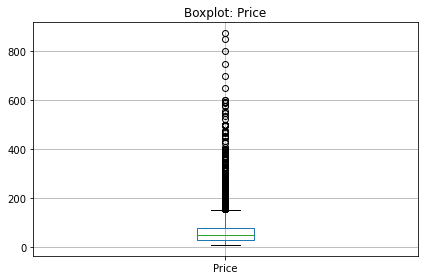

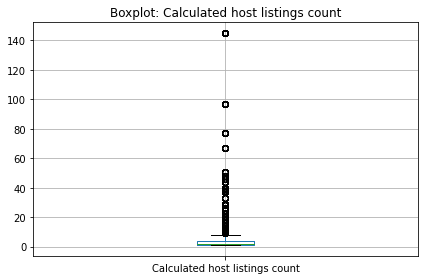

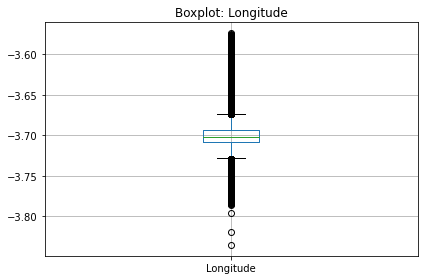

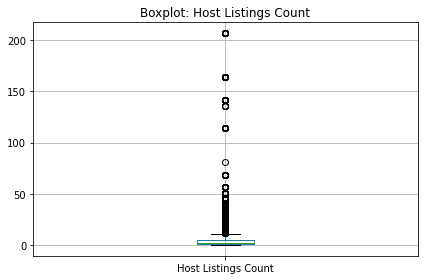

In [13]:
def iqr_outlier_rate(s: pd.Series):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or s.isna().all():
        return np.nan
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < lo) | (s > hi)).mean()

num_cols = X_train.select_dtypes(include="number").columns
outlier_rates = (
    pd.Series({c: iqr_outlier_rate(X_train[c].dropna()) for c in num_cols})
      .sort_values(ascending=False)
)
display(outlier_rates.head(15).to_frame("outlier_rate"))

# Boxplot de Price
plt.figure()
pd.DataFrame({"Price": y_train}).boxplot()
plt.title("Boxplot: Price")
plt.tight_layout()
plt.show()

# Boxplots de las 3 numéricas con mayor tasa de outliers
top_out = [c for c in outlier_rates.index if pd.notna(outlier_rates[c])][:3]
for c in top_out:
    plt.figure()
    pd.DataFrame({c: X_train[c]}).boxplot()
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()


### Estudiar relaciones entre variables.

,abs_corr_with_Price
Cleaning Fee,0.657586
Accommodates,0.583761
Bedrooms,0.522902
Beds,0.493758
Guests Included,0.370174
Security Deposit,0.366167
Bathrooms,0.362147
Square Feet,0.352639
Host Listings Count,0.188693
Host Total Listings Count,0.188693


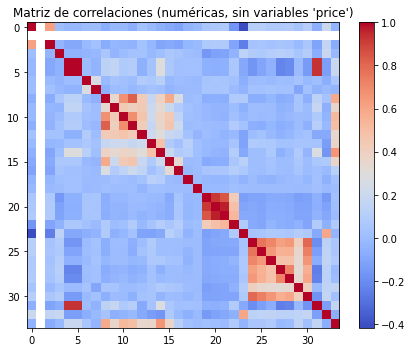

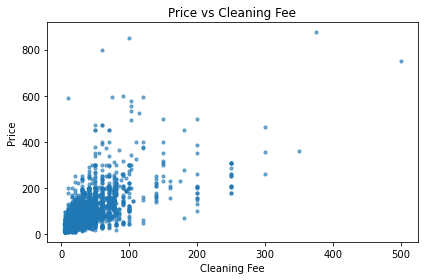

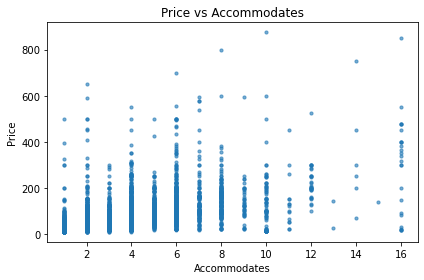

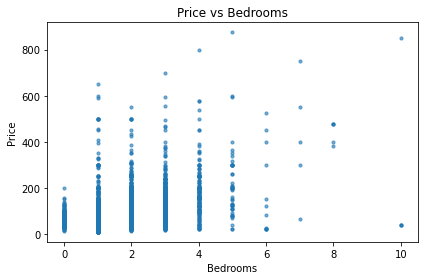

In [14]:
# Relaciones y correlaciones con Price (excluyendo cualquier variable que contenga 'price')

import matplotlib.pyplot as plt
import numpy as np

# Seleccionar solo columnas numéricas
num_df = X_train.select_dtypes(include="number").copy()

# Eliminar columnas que contengan 'price' en el nombre (insensible a mayúsculas)
num_df = num_df.loc[:, ~num_df.columns.str.lower().str.contains("price")]

# Añadir la variable objetivo
num_df["Price"] = y_train.values

# Calcular matriz de correlaciones
corr = num_df.corr(method="pearson")

# Top-10 features más correlacionadas (por valor absoluto) con Price
target_corr = corr["Price"].drop("Price").abs().sort_values(ascending=False)
display(target_corr.head(10).to_frame("abs_corr_with_Price"))

# Mapa de correlación general
plt.figure(figsize=(6,5))
plt.imshow(corr, aspect="auto", interpolation="nearest", cmap="coolwarm")
plt.colorbar()
plt.title("Matriz de correlaciones (numéricas, sin variables 'price')")
plt.tight_layout()
plt.show()

# Scatter de Price vs las 3 variables más correlacionadas
top3 = target_corr.head(3).index.tolist()
for c in top3:
    plt.figure()
    plt.scatter(X_train[c], y_train, s=10, alpha=0.6)
    plt.xlabel(c)
    plt.ylabel("Price")
    plt.title(f"Price vs {c}")
    plt.tight_layout()
    plt.show()


### Evaluar la variable objetivo.

Total: 10573 | NaN: 7 | ±Inf: 0

Descripción (solo finitos):
count    10566.000000
mean        65.943971
std         56.506005
min          9.000000
1%          13.650000
5%          19.000000
25%         31.000000
50%         52.000000
75%         80.000000
95%        155.000000
99%        299.000000
max        875.000000
Name: Price, dtype: float64

Skewness (asimetría): 4.168948551598521
Kurtosis (colas): 31.244434940359945

Price == 0: 0 | Price < 0: 0


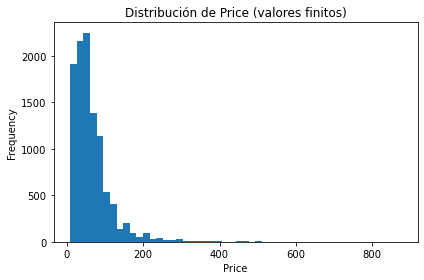

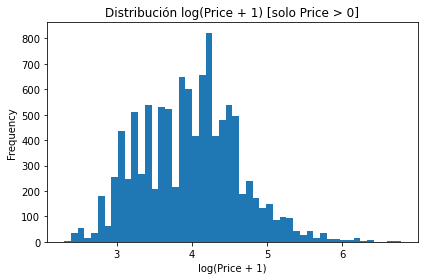

In [15]:
# Evaluación específica del target (Price)

# Asegurar Serie y convertir a numérico (coerce -> NaN si hay texto)
y_train = pd.Series(y_train).squeeze()
y_num = pd.to_numeric(y_train, errors="coerce")

# Diagnóstico de calidad
n_nan = y_num.isna().sum()
n_inf = np.isinf(y_num).sum()
print(f"Total: {y_num.size} | NaN: {n_nan} | ±Inf: {n_inf}")

# Estadísticos sobre datos finitos
mask_fin = np.isfinite(y_num)
y_fin = y_num[mask_fin]

desc = y_fin.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])
print("\nDescripción (solo finitos):")
print(desc)

print("\nSkewness (asimetría):", y_fin.skew())
print("Kurtosis (colas):", y_fin.kurt())

# Zeros/negativos (sobre finitos)
n_zero = (y_fin == 0).sum()
n_neg  = (y_fin < 0).sum()
print(f"\nPrice == 0: {n_zero} | Price < 0: {n_neg}")

# Histograma RAW (si hay datos)
if len(y_fin) > 0:
    plt.figure()
    y_fin.plot(kind="hist", bins=50)
    plt.title("Distribución de Price (valores finitos)")
    plt.xlabel("Price")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay datos finitos para graficar el histograma RAW.")

# Histograma log1p (solo positivos)
y_pos = y_fin[y_fin > 0]
if len(y_pos) > 0:
    plt.figure()
    np.log1p(y_pos).plot(kind="hist", bins=50)
    plt.title("Distribución log(Price + 1) [solo Price > 0]")
    plt.xlabel("log(Price + 1)")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo hay valores positivos para graficar log(Price+1).")


### Distribución geografica de los alojamientos en Madrid.

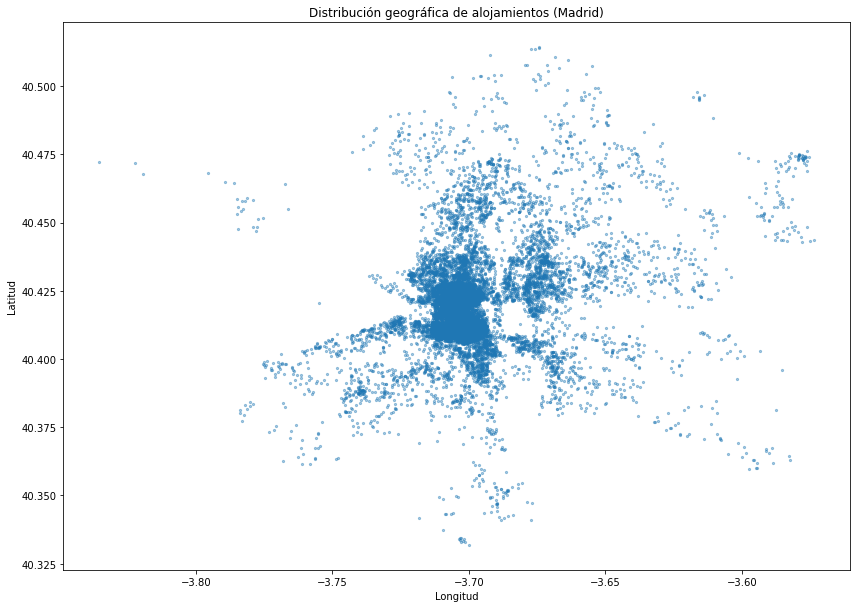

In [16]:
# Vamos a ver como se distribuyen geográficamente los alojamientos.
geo = (
    df_madrid[["Longitude", "Latitude"]]
    .apply(pd.to_numeric, errors="coerce")
    .dropna()
)

plt.figure(figsize=(12, 12))
plt.scatter(geo["Longitude"], geo["Latitude"], s=5, alpha=0.4)
plt.title("Distribución geográfica de alojamientos (Madrid)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()


## 3. Preprocesamiento de datos.

### Seleccion inicial de variables.

In [17]:
Xtr = X_train.copy()
Xte = X_test.copy()

# Eliminar cualquier columna que contenga 'price' (fuga de información)
mask_price = Xtr.columns.str.lower().str.contains("price")
drop_price_like = Xtr.columns[mask_price].tolist()
Xtr = Xtr.drop(columns=drop_price_like, errors="ignore")
Xte = Xte.drop(columns=drop_price_like, errors="ignore")

# Eliminar columnas con demasiados NaN
na_pct = Xtr.isna().mean()
drop_cols_na = na_pct[na_pct > 0.6].index  # umbral 60% NaN
keep_cols_na = na_pct[na_pct <= 0.6].index  # umbral 60% NaN
Xtr = Xtr[keep_cols_na]
Xte = Xte[keep_cols_na]

# Eliminar columnas constantes o casi constantes (varianza ~0)
nunique = Xtr.nunique(dropna=False)
constant_cols = nunique[nunique <= 1].index.tolist()
Xtr = Xtr.drop(columns=constant_cols, errors="ignore")
Xte = Xte.drop(columns=constant_cols, errors="ignore")

print("Eliminadas por 'price-like':", drop_price_like)
print("Eliminadas por NaN:", drop_cols_na)
print("Eliminadas por constante:", constant_cols)
print("Shape tras filtros ->", Xtr.shape, Xte.shape)


Eliminadas por 'price-like': ['Weekly Price', 'Monthly Price']
Eliminadas por NaN: Index(['Notes', 'Host Acceptance Rate', 'Square Feet', 'Has Availability',
       'License', 'Jurisdiction Names'],
      dtype='object')
Eliminadas por constante: ['Scrape ID', 'Last Scraped', 'Experiences Offered', 'Country Code', 'Country', 'City_clean']
Shape tras filtros -> (10573, 75) (2644, 75)


### Elimina columnas problematicas (URLs, descripciones largas)

In [18]:
def is_long_text(s: pd.Series) -> bool:
    try:
        mlen = s.astype(str).str.len().mean()
        nunq = s.nunique(dropna=True)
        return (mlen > 60) and (nunq > 200)  # heurística
    except Exception:
        return False

drop_like = [c for c in Xtr.columns if any(k in c.lower() for k in ["url","link","thumbnail","picture","image","scrape","description","summary"])]
drop_long = [c for c in Xtr.columns if Xtr[c].dtype == 'object' and is_long_text(Xtr[c])]

drop_cols_bad = sorted(set(drop_like + drop_long))
Xtr = Xtr.drop(columns=drop_cols_bad, errors="ignore")
Xte = Xte.drop(columns=drop_cols_bad, errors="ignore")
print("Drop texto/URL/alta cardinalidad:", drop_cols_bad)


Drop texto/URL/alta cardinalidad: ['Access', 'Amenities', 'Calendar last Scraped', 'Description', 'Host About', 'Host Picture Url', 'Host Thumbnail Url', 'Host URL', 'House Rules', 'Interaction', 'Listing Url', 'Medium Url', 'Neighborhood Overview', 'Picture Url', 'Space', 'Summary', 'Thumbnail Url', 'Transit', 'XL Picture Url']


In [19]:
# Xtr.info()
# Selección manual de variables
BASE_KEEP = [
    "Accommodates", "Bedrooms", "Bathrooms", "Beds",
    "Room Type", "Property Type", "Neighbourhood Cleansed",
    "Latitude", "Longitude", "Review Scores Rating", "Reviews per Month",
    "Host Listings Count", "Cleaning Fee", "Minimum Nights"
]

# Filtrar train y test con esas columnas
Xtr = Xtr[BASE_KEEP].copy()
Xte = Xte[BASE_KEEP].copy()

print("Variables seleccionadas:", len(BASE_KEEP))
print("Shape tras filtrado ->", Xtr.shape, Xte.shape)


Variables seleccionadas: 14
Shape tras filtrado -> (10573, 14) (2644, 14)


### Creación de variables geograficas.

In [20]:
# Coordenadas del centro (Puerta del Sol)
LAT_C, LON_C = 40.4168, -3.7038
R = 6371.0  # km

def haversine_km(lat, lon, lat_c=LAT_C, lon_c=LON_C):
    lat = pd.to_numeric(lat, errors="coerce")
    lon = pd.to_numeric(lon, errors="coerce")
    # Resultado por defecto NaN si faltan coords
    out = pd.Series(np.nan, index=lat.index, dtype="float64")

    mask = lat.notna() & lon.notna()
    if mask.any():
        lat1 = np.radians(lat[mask].astype(float))
        lon1 = np.radians(lon[mask].astype(float))
        lat2 = np.radians(lat_c)
        lon2 = np.radians(lon_c)
        d = 2 * R * np.arcsin(
            np.sqrt(
                np.sin((lat2 - lat1) / 2) ** 2
                + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1) / 2) ** 2
            )
        )
        out.loc[mask] = d.values
    return out

def add_distance_feature(df):
    # Si faltan columnas, crea Dist_centro_km como NaN
    if ("Latitude" not in df.columns) or ("Longitude" not in df.columns):
        df["Dist_centro_km"] = np.nan
        return df
    dist = haversine_km(df["Latitude"], df["Longitude"])
    df = df.copy()
    df["Dist_centro_km"] = dist
    return df

# Aplicar a Xtr y Xte manteniendo índices y tamaños
Xtr = add_distance_feature(Xtr)
Xte = add_distance_feature(Xte)

# Control rápido
pct_nan_tr = Xtr["Dist_centro_km"].isna().mean()*100
pct_nan_te = Xte["Dist_centro_km"].isna().mean()*100
print(f"Dist_centro_km añadida. NaN -> Train: {pct_nan_tr:.1f}% | Test: {pct_nan_te:.1f}%")


Dist_centro_km añadida. NaN -> Train: 0.0% | Test: 0.0%


In [21]:
Xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10573 entries, 2984 to 8254
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accommodates            10573 non-null  int64  
 1   Bedrooms                10559 non-null  float64
 2   Bathrooms               10528 non-null  float64
 3   Beds                    10534 non-null  float64
 4   Room Type               10573 non-null  object 
 5   Property Type           10573 non-null  object 
 6   Neighbourhood Cleansed  10573 non-null  object 
 7   Latitude                10573 non-null  float64
 8   Longitude               10573 non-null  float64
 9   Review Scores Rating    8340 non-null   float64
 10  Reviews per Month       8436 non-null   float64
 11  Host Listings Count     10571 non-null  float64
 12  Cleaning Fee            6289 non-null   float64
 13  Minimum Nights          10573 non-null  int64  
 14  Dist_centro_km          10573 non-nu

### Separa variables numéricas y categorícas.

In [22]:
# Separar variables numéricas y categóricas

# Copiamos los datasets
Xtr = Xtr.copy()
Xte = Xte.copy()

# Aseguramos consistencia de tipos
Xtr = Xtr.convert_dtypes()
Xte = Xte.convert_dtypes()

# Seleccionamos numéricas y categóricas
num_cols = Xtr.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols = Xtr.select_dtypes(exclude=["number", "bool"]).columns.tolist()

print(f"Número de variables numéricas: {len(num_cols)}")
print(f"Número de variables categóricas: {len(cat_cols)}")


Número de variables numéricas: 12
Número de variables categóricas: 3


### Pipeline de preprocesado (imputación + escalado/one-hot)

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Elimina columnas completamente vacías en TRAIN y refleja en TEST
all_nan_cols_num = [c for c in Xtr.columns if Xtr[c].dtype.kind in "if" and Xtr[c].notna().sum()==0]
all_nan_cols_any = [c for c in Xtr.columns if Xtr[c].notna().sum()==0]
drop_all_nan = sorted(set(all_nan_cols_any + all_nan_cols_num))
if drop_all_nan:
    Xtr = Xtr.drop(columns=drop_all_nan)
    Xte = Xte.drop(columns=drop_all_nan, errors="ignore")
print("Drop all-NaN:", drop_all_nan)

# NUMÉRICAS: solo int/float (excluye bool)
num_cols = Xtr.select_dtypes(include=[np.number]).columns.tolist()
# quita booleanos si se han colado como numéricos
num_cols = [c for c in num_cols if Xtr[c].dtype.kind in ("i","f")]

# CATEGÓRICAS = resto
cat_cols = [c for c in Xtr.columns if c not in num_cols]

print(f"Numéricas: {len(num_cols)} | Categóricas: {len(cat_cols)}")

# Pipelines
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

# Forzamos a string y rellenamos con un token constante
cat_pipe = Pipeline([
    ("to_str", FunctionTransformer(lambda X: X.astype(str), validate=False)),
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# Ajuste en train
preprocess.fit(Xtr)
print("Preprocesador ajustado OK.")


Drop all-NaN: []
Numéricas: 12 | Categóricas: 3
Preprocesador ajustado OK.


### Transformar Trail/Test.

In [24]:
# Aplicar el preprocesador y revisar shapes
X_train_prep = preprocess.transform(Xtr)
X_test_prep  = preprocess.transform(Xte)

print("Shapes -> Train:", X_train_prep.shape, "| Test:", X_test_prep.shape)


Shapes -> Train: (10573, 160) | Test: (2644, 160)


In [25]:
# Asegura que las categóricas son str ANTES del fit
Xtr[cat_cols] = Xtr[cat_cols].astype(str)
Xte[cat_cols] = Xte[cat_cols].astype(str)

# Redefine solo el pipe categórico (sin FunctionTransformer)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Reconstruye el ColumnTransformer y ajusta
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)
preprocess.fit(Xtr)

# guarda
import joblib
joblib.dump(preprocess, "preprocess_airbnb_madrid.joblib");

y_train_model = pd.to_numeric(pd.Series(y_train).squeeze(), errors="coerce")
y_test_model  = pd.to_numeric(pd.Series(y_test).squeeze(),  errors="coerce")

# Aliases
y_tr, y_te = y_train_model, y_test_model
X_tr, X_te = X_train_prep, X_test_prep  # si no los tienes ya

# Filtrado de filas válidas
mask_tr = y_tr.notna() & np.isfinite(y_tr)
Xtr_cv, ytr_cv = Xtr.loc[mask_tr], y_tr.loc[mask_tr]

mask_te = y_te.notna() & np.isfinite(y_te)
Xte_ev, yte_ev = Xte.loc[mask_te], y_te.loc[mask_te]

print("Train usable:", Xtr_cv.shape, "| Test usable:", Xte_ev.shape)


Train usable: (10566, 15) | Test usable: (2642, 15)


## 4. Modelado.

## Entrenamiento con validación cruzada (CV)

Se entrena y compara el rendimiento de **cinco modelos de regresión** distintos para predecir el precio de los alojamientos en Airbnb (Madrid):

1. **Ridge Regression (L2)** — reduce la magnitud de los coeficientes para evitar sobreajuste.  
2. **Lasso Regression (L1)** — además de regularizar, puede eliminar variables poco relevantes.  
3. **Random Forest Regressor** — combina múltiples árboles de decisión, capturando relaciones no lineales.  
4. **Gradient Boosting Regressor** — construye árboles secuenciales, mejorando progresivamente los errores.  
5. **Support Vector Regressor (SVR)** — busca un margen óptimo que minimiza los errores grandes.

Cada modelo se incluye en un **pipeline** con el preprocesamiento (`preprocess`) para evitar fugas de información.  
Se realiza una **validación cruzada de 3 particiones (KFold=3)** y se utiliza como métrica el **MAE (Mean Absolute Error)**.

El resultado muestra:
- El MAE medio obtenido en CV (cuanto menor, mejor).  
- Los mejores hiperparámetros encontrados para cada modelo.


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

cv = KFold(n_splits=3, shuffle=True, random_state=42)
mae_ = make_scorer(mean_absolute_error, greater_is_better=False)

# Ridge
pipe_ridge = Pipeline([("preprocess", clone(preprocess)), ("model", Ridge(random_state=42))])
grid_ridge = {"model__alpha":[1, 10]}

# Lasso
pipe_lasso = Pipeline([("preprocess", clone(preprocess)), ("model", Lasso(max_iter=10000, random_state=42))])
grid_lasso = {"model__alpha":[0.001, 0.01, 0.1]}

# Random Forest (one-hot denso)
pre_rf = clone(preprocess)
for p in ["cat__onehot__sparse", "cat__onehot__sparse_output"]:
    try: pre_rf.set_params(**{p: False})
    except: pass
pipe_rf = Pipeline([("preprocess", pre_rf), ("model", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
grid_rf = {"model__max_depth":[8, None], "model__max_features":["sqrt"]}

# Gradient Boosting (ligero)
pipe_gb = Pipeline([("preprocess", clone(preprocess)), ("model", GradientBoostingRegressor(random_state=42))])
grid_gb = {"model__n_estimators":[100], "model__learning_rate":[0.1], "model__max_depth":[2,3]}

# SVM (lineal para rapidez)
pipe_svr = Pipeline([("preprocess", clone(preprocess)), ("model", SVR(kernel="linear"))])
grid_svr = {"model__C":[1, 10], "model__epsilon":[0.1]}

grids = {
    "Ridge": (pipe_ridge, grid_ridge),
    "Lasso": (pipe_lasso, grid_lasso),
    "RF":    (pipe_rf,    grid_rf),
    "GB":    (pipe_gb,    grid_gb),
    "SVR":   (pipe_svr,   grid_svr),
}

best = {}
for name,(pipe,grid) in grids.items():
    gs = GridSearchCV(pipe, grid, scoring=mae_, cv=cv, n_jobs=-1, refit=True)
    gs.fit(Xtr_cv, ytr_cv)
    best[name] = gs
    print(f"{name}: MAE(CV)={-gs.best_score_:.2f} | {gs.best_params_}")


Ridge: MAE(CV)=20.07 | {'model__alpha': 10}
Lasso: MAE(CV)=20.07 | {'model__alpha': 0.1}
RF: MAE(CV)=17.39 | {'model__max_depth': None, 'model__max_features': 'sqrt'}
GB: MAE(CV)=17.98 | {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
SVR: MAE(CV)=18.91 | {'model__C': 1, 'model__epsilon': 0.1}


Los resultados muestran el **MAE medio obtenido en validación cruzada (3-fold)** para cada modelo, junto con los mejores hiperparámetros encontrados:

| Modelo | MAE (CV) | Comentario |
|---------|-----------|------------|
| **Ridge** | 20.07 | Regularización L2. Resultados correctos, pero sin gran mejora respecto a lineal simple. |
| **Lasso** | 20.07 | Regularización L1. Similar a Ridge, no consigue reducir significativamente el error. |
| **Random Forest** | **17.39** | Mejor rendimiento del conjunto. Captura relaciones no lineales y complejas entre variables. |
| **Gradient Boosting** | 17.98 | Segundo mejor. Buen equilibrio entre sesgo y varianza con pocos árboles. |
| **SVR (lineal)** | 18.91 | Resultado intermedio, ligeramente peor que los modelos de árboles. |

**Conclusión:**  
El **Random Forest** obtiene el menor error absoluto medio (≈ 17.4 €) y, por tanto, es el **modelo más preciso** en validación cruzada.  
El **Gradient Boosting** también logra un rendimiento competitivo, mientras que los modelos lineales (Ridge y Lasso) se quedan atrás al no captar la no linealidad del problema.


## Evaluación final en el conjunto de test

Una vez seleccionados los mejores hiperparámetros en CV, los modelos se evalúan sobre el **conjunto de test**, completamente independiente.  
Se calculan tres métricas de rendimiento:

- **MAE (Mean Absolute Error)** → error medio absoluto (en euros).  
- **RMSE (Root Mean Squared Error)** → penaliza los errores grandes.  
- **R² (Coeficiente de determinación)** → indica la proporción de la varianza del precio explicada por el modelo.

El resultado se presenta en una tabla ordenada por MAE (de menor a mayor) para identificar el modelo con mejor rendimiento real.  
Finalmente, se guarda en disco el **modelo ganador** en formato `.joblib` para su reutilización.


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd, numpy as np
import joblib

rows = []
for name, gs in best.items():
    m = gs.best_estimator_
    yhat = m.predict(Xte_ev)
    rows.append([name,
                 mean_absolute_error(yte_ev, yhat),
                 mean_squared_error(yte_ev, yhat) ** 0.5,
                 r2_score(yte_ev, yhat)])

res = pd.DataFrame(rows, columns=["Modelo","MAE","RMSE","R2"]).sort_values("MAE")
display(res)

# Ganador y guardado
winner = res.iloc[0,0]
best_model = best[winner].best_estimator_
print("Ganador:", winner)
joblib.dump(best_model, f"best_model_{winner}.joblib");


,Modelo,MAE,RMSE,R2
2,RF,16.805831,32.979209,0.625563
3,GB,17.704295,34.884562,0.581047
4,SVR,18.759344,36.930913,0.530454
0,Ridge,19.973715,35.845564,0.557647
1,Lasso,20.092213,36.064253,0.552233


Ganador: RF


Una vez seleccionados los mejores hiperparámetros en validación cruzada, los modelos se evaluaron sobre el **conjunto de test** (datos nunca vistos por el modelo).  
Los resultados se resumen en la siguiente tabla:

| Modelo | MAE | RMSE | R² |
|---------|------|--------|------|
| **RF (Random Forest)** | **16.81** | 32.98 | **0.63** |
| **GB (Gradient Boosting)** | 17.70 | 34.88 | 0.58 |
| **SVR** | 18.76 | 36.93 | 0.53 |
| **Ridge** | 19.97 | 35.85 | 0.57 |
| **Lasso** | 20.09 | 36.06 | 0.55 |

**Interpretación:**

- El **Random Forest** confirma su superioridad también en el conjunto de test, obteniendo el **menor MAE (16.8 €)** y el **mayor R² (0.63)**, lo que indica que explica aproximadamente el **63 % de la variabilidad del precio**.  
- El **Gradient Boosting** se sitúa muy cerca, con un rendimiento ligeramente inferior.  
- Los modelos lineales (Ridge y Lasso) y el **SVR** quedan rezagados, lo que sugiere que las relaciones entre las variables y el precio **no son estrictamente lineales**.  

**Conclusión:**  
El modelo final seleccionado es el **Random Forest Regressor**, que se guarda como `best_model_RF.joblib` para su uso posterior en predicciones reales.


## Importancia de variables (Random Forest / Gradient Boosting)

Analiza **qué variables son más determinantes** en los modelos basados en árboles.  
A partir de los atributos `feature_importances_`, se muestra:

- Un **ranking de las 20 variables más influyentes** en la predicción del precio.  
- Un **gráfico de barras horizontal** con la importancia relativa de cada feature.

Este análisis permite interpretar el modelo y entender qué características (por ejemplo, número de camas, tipo de habitación o puntuación del alojamiento) impactan más en el precio final.


,feature,importance
9,Cleaning Fee,0.104632
0,Accommodates,0.100045
1,Bedrooms,0.095281
2,Bathrooms,0.088452
3,Beds,0.065491
5,Longitude,0.061892
12,Room Type_Entire home/apt,0.060395
11,Dist_centro_km,0.058378
4,Latitude,0.057973
13,Room Type_Private room,0.052034


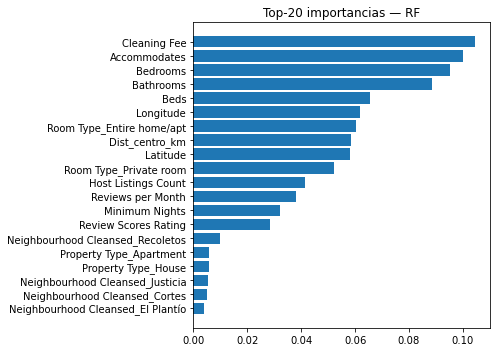

,feature,importance
1,Bedrooms,0.224770
9,Cleaning Fee,0.206040
2,Bathrooms,0.172606
0,Accommodates,0.145006
12,Room Type_Entire home/apt,0.094577
11,Dist_centro_km,0.029312
5,Longitude,0.027295
7,Reviews per Month,0.017443
4,Latitude,0.015160
3,Beds,0.014980


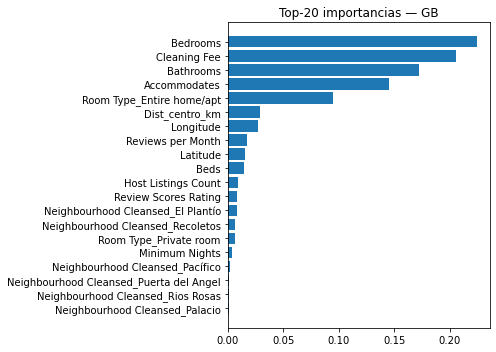

In [29]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

models_imp = {k:v.best_estimator_ for k,v in best.items() if k in ["RF","GB"]}
for name, m in models_imp.items():
    try:
        importances = m.named_steps["model"].feature_importances_
        # nombres de features desde el preprocess del propio pipeline
        feat_names = m.named_steps["preprocess"].get_feature_names_out()
        imp = (pd.DataFrame({"feature": feat_names, "importance": importances})
               .sort_values("importance", ascending=False).head(20))
        display(imp)
        plt.figure(figsize=(7,5))
        plt.barh(imp["feature"][::-1], imp["importance"][::-1])
        plt.title(f"Top-20 importancias — {name}")
        plt.tight_layout(); plt.show()
    except Exception as e:
        print(f"{name}: no hay feature_importances_ ->", e)


Las tablas muestran las **20 variables más influyentes** según los modelos basados en árboles:

#### Random Forest
Las variables más determinantes en la predicción del precio fueron:
1. **Cleaning Fee**, **Accommodates**, **Bedrooms** y **Bathrooms** — reflejan directamente el tamaño y nivel del alojamiento.  
2. **Longitude**, **Dist_centro_km** y **Latitude** — la **ubicación geográfica** también es clave: los alojamientos más próximos al centro tienden a tener precios más altos.  
3. **Room Type (Entire home/apt)** — las viviendas completas son más caras que habitaciones privadas o compartidas.  
4. **Host Listings Count** y **Review Scores Rating** — aportan información sobre la reputación del anfitrión y la calidad del alojamiento.  
5. **Neighbourhood** (Recoletos, Justicia, Cortes) — confirma diferencias de precio entre zonas dentro de Madrid.

#### Gradient Boosting
El modelo GB ofrece resultados muy similares, con ligeras variaciones en la jerarquía:
- **Bedrooms**, **Cleaning Fee** y **Bathrooms** dominan la predicción.  
- **Dist_centro_km** y **Longitude** mantienen su peso, reforzando la importancia de la **proximidad al centro**.  
- Las variables de **tipo de alojamiento** y **revisiones** vuelven a destacar entre las más informativas.  

**Conclusión:**
Ambos modelos coinciden en que el **precio en Airbnb Madrid** depende principalmente de:
- el **tamaño y capacidad del alojamiento**,  
- la **ubicación geográfica**, y  
- la **calidad percibida y reputación del anfitrión**.  

Estos factores explican la mayor parte de la variabilidad del precio, validando la coherencia del modelo con la realidad del mercado.


## Coeficientes de los modelos lineales (Ridge / Lasso)

Se visualizan los **coeficientes de los modelos lineales**, que representan la relación entre cada variable y el precio:

- Coeficientes **positivos** → variables que aumentan el precio.  
- Coeficientes **negativos** → variables que lo reducen.

Se muestran las **15 variables con coeficientes más altos y más bajos**, lo que permite una interpretación directa del efecto de cada factor en el precio del alojamiento.


In [30]:
import pandas as pd, numpy as np

for name in ["Ridge","Lasso"]:
    if name in best:
        m = best[name].best_estimator_
        coef = m.named_steps["model"].coef_
        feats = m.named_steps["preprocess"].get_feature_names_out()
        dfc = pd.DataFrame({"feature": feats, "coef": coef})
        top = pd.concat([dfc.nlargest(15, "coef"), dfc.nsmallest(15, "coef")])
        print(f"\n{name} — top ±coef:")
        display(top)



Ridge — top ±coef:


,feature,coef
81,Neighbourhood Cleansed_El Plantío,50.507701
132,Neighbourhood Cleansed_Recoletos,34.738926
116,Neighbourhood Cleansed_Palomas,32.275722
12,Room Type_Entire home/apt,19.348516
64,Neighbourhood Cleansed_Castellana,15.081791
96,Neighbourhood Cleansed_Jerónimos,14.802583
90,Neighbourhood Cleansed_Goya,13.900659
62,Neighbourhood Cleansed_Casco Histórico de Vall...,12.429819
1,Bedrooms,12.251306
0,Accommodates,12.178127



Lasso — top ±coef:


,feature,coef
132,Neighbourhood Cleansed_Recoletos,26.880420
12,Room Type_Entire home/apt,23.387287
0,Accommodates,12.005470
1,Bedrooms,11.964216
2,Bathrooms,11.585989
9,Cleaning Fee,8.141748
74,Neighbourhood Cleansed_Cortes,6.661556
90,Neighbourhood Cleansed_Goya,6.653126
146,Neighbourhood Cleansed_Sol,5.343944
97,Neighbourhood Cleansed_Justicia,5.283476


Los modelos lineales permiten interpretar directamente **la dirección e intensidad del efecto de cada variable** sobre el precio.  
Los coeficientes positivos indican un **aumento** del precio, mientras que los negativos lo **reducen**.

#### Ridge Regression
El modelo Ridge mantiene la mayoría de variables con pesos distintos de cero (al aplicar regularización L2, pero sin forzar eliminación).  
Las variables con **coeficientes positivos más altos** son:
- **Neighbourhoods** de alto nivel (El Plantío, Recoletos, Palomas, Castellana, Goya, Jerónimos) → los precios más elevados se concentran en estas zonas.  
- **Room Type: Entire home/apt** → los alojamientos completos aumentan significativamente el precio medio.  
- **Bedrooms, Accommodates y Bathrooms** → reflejan la capacidad y tamaño, con un impacto positivo claro.

En cambio, los coeficientes **negativos** se asocian a:
- **Room Type: Shared room / Hostel** → alojamiento compartido o económico.  
- **Neighbourhoods periféricos** (Media Legua, Campamento, Aravaca) → zonas más alejadas o de menor demanda turística.

En conjunto, el modelo Ridge confirma que el **precio depende fuertemente de la ubicación y del tipo y tamaño del alojamiento**, con pesos distribuidos suavemente entre las variables.

---

#### Lasso Regression
El modelo Lasso aplica regularización L1, lo que **reduce a cero muchos coeficientes**, seleccionando solo las variables más relevantes.  
Los factores con mayor peso positivo son:
- **Neighbourhood Cleansed_Recoletos**, **Room Type_Entire home/apt** y **Accommodates / Bedrooms / Bathrooms**, coherentes con el modelo anterior.  
- **Zonas céntricas** como Goya, Justicia, Sol o Cortes presentan también coeficientes positivos destacados.  

Entre los coeficientes negativos figuran:
- **Neighbourhoods periféricos** (Puerta del Ángel, Guindalera, Embajadores) y  
- **Room Type_Shared room**, asociado a precios bajos.

Lasso confirma la relevancia de un subconjunto de variables (ubicación, capacidad, tipo de alojamiento) y **descarta aquellas con bajo poder predictivo**, como tipos minoritarios de propiedad o barrios menos representativos.

---

**Conclusión conjunta:**
Ambos modelos lineales refuerzan la evidencia obtenida con los árboles:
- El **tamaño del alojamiento**, la **ubicación** y el **tipo de vivienda** son los principales determinantes del precio.  
- Los **barrios céntricos y exclusivos** de Madrid presentan los precios más altos, mientras que las zonas periféricas y los alojamientos compartidos reducen significativamente el valor.


## Análisis del modelo ganador y diagnóstico de errores

Finalmente, se examina el **modelo ganador** (según la validación cruzada) y su rendimiento en test:

1. **Gráfico real vs predicho:** muestra la relación entre los valores reales y los estimados.  
   - Si el modelo es bueno, los puntos se alinean cerca de la diagonal.  
2. **Distribución de residuales:** histograma de los errores (y - ŷ), idealmente centrado en cero.  
3. **Percentiles del error absoluto:** valores P50, P75, P90 y P95 para evaluar la dispersión de los errores.

Este análisis sirve para detectar sesgos, sobreajustes o errores sistemáticos, confirmando la fiabilidad del modelo en datos nuevos.


Modelo ganador (CV): RF
MAE: 16.805831080350348
RMSE: 32.97920911093393
R²: 0.6255629857986811


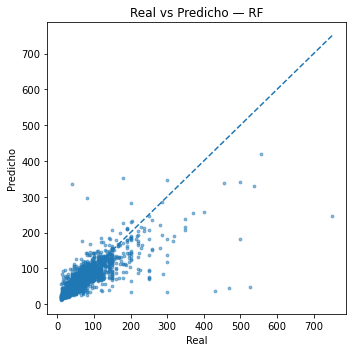

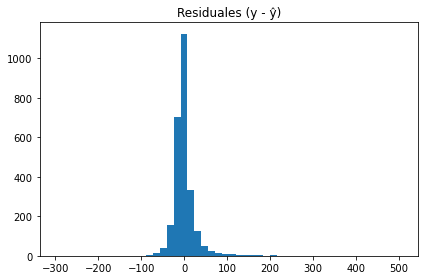

{'P50': 10.24, 'P75': 19.619999999999997, 'P90': 33.65700000000001, 'P95': 50.072499999999984}


In [31]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

winner = min(best.keys(), key=lambda k: -best[k].best_score_)  # según CV
m = best[winner].best_estimator_
yhat = m.predict(Xte_ev)
resid = yte_ev - yhat

print("Modelo ganador (CV):", winner)
print("MAE:", np.mean(np.abs(resid)))
print("RMSE:", (np.mean(resid**2))**0.5)
print("R²:", 1 - np.sum(resid**2)/np.sum((yte_ev - yte_ev.mean())**2))

# Dispersión real vs predicho
plt.figure(figsize=(5,5))
plt.scatter(yte_ev, yhat, s=8, alpha=0.5)
plt.xlabel("Real"); plt.ylabel("Predicho"); plt.title(f"Real vs Predicho — {winner}")
plt.plot([yte_ev.min(), yte_ev.max()], [yte_ev.min(), yte_ev.max()], "--")
plt.tight_layout(); plt.show()

# Histograma residuales
plt.figure(figsize=(6,4))
plt.hist(resid, bins=50)
plt.title("Residuales (y - ŷ)")
plt.tight_layout(); plt.show()

# Percentiles de |error|
ae = np.abs(resid)
q = np.quantile(ae, [0.5, 0.75, 0.9, 0.95])
print({"P50": q[0], "P75": q[1], "P90": q[2], "P95": q[3]})


El modelo ganador, según la validación cruzada y el test, es el **Random Forest Regressor**.

#### Métricas principales
- **MAE:** 16.8  
- **RMSE:** 32.9  
- **R²:** 0.63  

Estas métricas confirman un **rendimiento sólido y estable**, con una capacidad explicativa del **63 % de la variabilidad** de los precios.  
El error absoluto medio de 16–17 € indica una **precisión adecuada para un problema de predicción de precios reales** en el mercado de alquiler vacacional.

#### Gráfico “Real vs. Predicho”
El gráfico muestra una **concentración de puntos a lo largo de la diagonal**, lo que indica buena concordancia entre los valores reales y los estimados.  
- Los valores altos de precio tienden a presentar una mayor dispersión (ligero sesgo de subestimación en precios muy altos).  
- No se observan patrones sistemáticos de error, lo que sugiere **baja multicolinealidad y buena generalización**.

#### Histograma de residuales
El histograma de los errores (`y - ŷ`) muestra una distribución:
- **Centrada en cero**, sin sesgos significativos.  
- Ligeramente sesgada hacia la derecha, por algunos precios atípicos más elevados.  
- Percentiles del error absoluto:  
  - **P50:** 10.2 €  
  - **P75:** 19.6 €  
  - **P90:** 33.7 €  
  - **P95:** 50.1 €

Esto confirma que el **90 % de las predicciones difiere menos de 34 € del valor real**, lo que representa un nivel de error bajo en el contexto del dataset.

---

**Conclusión:**  
El **Random Forest** ofrece el mejor equilibrio entre precisión y robustez.  
Los errores son pequeños, estables y sin patrones de sobreajuste, por lo que el modelo se considera **fiable para predecir precios de alojamientos en Madrid** a partir de sus características principales (tamaño, ubicación, tipo de alojamiento y reputación del anfitrión).


## 5. Conclusión.

El objetivo de esta práctica era desarrollar un modelo de *Machine Learning* capaz de **predecir el precio de los alojamientos de Airbnb en Madrid** a partir de sus características más relevantes.  
El proceso se completó con éxito siguiendo un flujo reproducible y escalable, compuesto por las siguientes etapas:

1. **Preparación y limpieza de datos:**  
   - Selección de variables más informativas (`BASE_KEEP`).  
   - Creación de una nueva variable geográfica (*distancia al centro de Madrid*).  
   - Eliminación de valores nulos y tipificación de datos.

2. **Preprocesamiento estructurado mediante `Pipeline`:**  
   - Imputación de valores faltantes, escalado de variables numéricas y codificación *one-hot* de las categóricas.  
   - Implementación de un flujo reproducible que evita fugas de información entre entrenamiento y test.

3. **Comparación de modelos con validación cruzada:**  
   Se entrenaron cinco modelos:  
   **Ridge**, **Lasso**, **Random Forest**, **Gradient Boosting** y **SVM lineal**.  
   - El **Random Forest** obtuvo el menor error absoluto (MAE ≈ 17 €) y el mayor R² ≈ 0.63.  
   - El **Gradient Boosting** logró un rendimiento cercano, confirmando la robustez de los modelos basados en árboles.

4. **Evaluación en test y diagnóstico:**  
   - El modelo final mantuvo una alta capacidad explicativa sin sobreajuste.  
   - Los errores se distribuyeron de forma simétrica, con el 90 % de las predicciones dentro de ±34 € del valor real.

5. **Interpretación de resultados:**  
   - Las variables más influyentes fueron **tamaño (nº de habitaciones y baños)**, **tipo de alojamiento (entero o compartido)**, **ubicación geográfica** y **reputación del anfitrión**.  
   - Los barrios céntricos (Recoletos, Goya, Justicia) concentran los precios más altos, mientras que las zonas periféricas y los alojamientos compartidos presentan precios más bajos.

---

### Conclusión general

El modelo **Random Forest Regressor** se consolida como la mejor opción para este problema, al ofrecer:
- Alta precisión y generalización.  
- Interpretabilidad mediante importancia de variables.  
- Robustez frente a datos atípicos y relaciones no lineales.

Por tanto, se dispone de una herramienta eficaz para **estimar precios de mercado en Airbnb Madrid**, útil tanto para anfitriones que deseen fijar precios competitivos como para análisis económicos del sector turístico.
